In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


# 2.1
How to make Linear Regression model:
* Load the Data Reshape the data
* Split the data so we train with some of it and test with some of it
* Create and fit the model using scikitlearn
* Plot the model

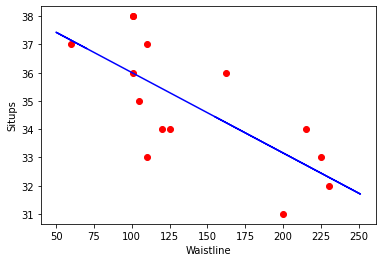

Mean error: 3.94 (11.5%)


In [39]:
# Load the dataset
df = datasets.load_linnerud()

# Reshape the data
waistline = df.data[:, 1].reshape(-1, 1)
situps = df.target[:, 1].reshape(-1, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(waistline, situps, test_size=0.3)

# Create and fit the model
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

# Predict the model
pred = lin_reg.predict(X_test)

# Show the model
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, pred, color='blue')
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.show()

# Calculate and print the mean squared error
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

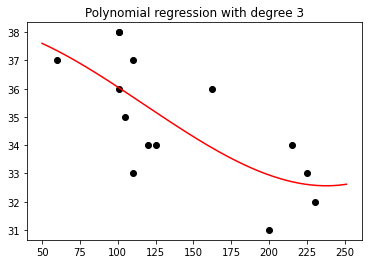

Mean error: 3.88 (11.3%)


In [40]:
# Make polynomial features
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
X_seq = np.linspace(X_test.min(), X_test.max(), 300).reshape(-1, 1)
predL = polyreg.predict(X_test)

# Show the model
plt.figure()
plt.scatter(X_train, y_train, color='black')
plt.plot(X_seq, polyreg.predict(X_seq), color="red")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

# Calculate and print the mean squared error
mse = np.sqrt(mean_squared_error(y_test,predL))
print(f'Mean error: {mse:3.3} ({mse/np.mean(predL)*100:3.3}%)')

# 2.2
In the lesson, you used a subset of the pumpkin data. Now, go back to the original data and try to use all of it, cleaned and standardized, to build a Logistic Regression model in a Jupyter notebook. Evaluate your model by a confusion matrix: remember to calculate and visualize the ROC curve. Aim for a well-explained and well-performing model in your notebook.

In [41]:
# Import Pumpkin dataset
pumpkins = pd.read_csv('../2-Regression/data/US-pumpkins.csv')

In [42]:
new_columns = ['Color', 'Origin','Item Size','Variety','City Name','Package', 'Date', 'Low Price', 'High Price']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


In [43]:
Selected_features = ['Origin','Item Size','Variety','City Name','Package','Date', 'Low Price', 'High Price']
new_X = new_pumpkins[Selected_features]
new_y = new_pumpkins['Color']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
predict_pls = model.predict(X_test)

confusion_matrix(y_test, predict_pls)

array([[161,   5],
       [ 33,   0]], dtype=int64)

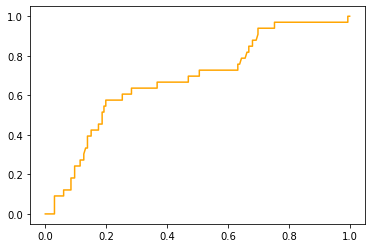

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve', color='orange')